## Лабораторна робота №2: "Імплементація алгоритмів стиснення"

Склад команди та розподіл виконаних завдань:

- Кравчук Євгеній
- Сень Іван

Для кожного з алгоритмів поданих нижче
- опишіть як працює алгорит
- напишіть класи з методами encode та decode
- перевірте правильність кодування та декодування
- дослідіть час виконання коду в залежності від розмірів вхідних даних
- оцініть ступінь стиснення(у відсотка) в залежності від розмірів
- напишіть висновок про ефективність різних алгоритмів та умови за яких той чи інший алгоритм дають кращий результат

# Алгоритм Гаффмана

В цьому алгоритмі доцільно імплементувати клас node та додаткові функції в Huffman для побудови дерева кодування

In [4]:
class NodeTree:
    def __init__(self, left, right):
        self.left = left 
        self.right = right

    def children(self):
        return (self.left, self.right)

In [13]:
class Huffman:
    def calculate_frequency(self, string):
        freq = {}
        for symb in string:
            if symb in freq:
                freq[symb] += 1
            else:
                freq[symb] = 1

        return sorted(freq.items(), key=lambda x: x[1], reverse=True)

    def build_tree(self, freq):
        nodes = freq.copy()
        while len(nodes) > 1:
            (symb1, count1) = nodes[-1]
            (symb2, count2) = nodes[-2]
            nodes = nodes[:-2]
            node = NodeTree(symb1, symb2)
            nodes.append((node, count1+count2))

            nodes = sorted(nodes, key=lambda x: x[1], reverse=True)
        return nodes

    


    def huffman_code_tree(self, node, left=True, binString=''):
        if type(node) is str:
            return {node: binString}
        (left_node, right_node) = node.children()
        final_dict = dict()
        final_dict.update(self.huffman_code_tree(left_node, True, binString + '0'))
        final_dict.update(self.huffman_code_tree(right_node, False, binString + '1'))
        return final_dict

    def get_code_dict(self, text):
        frequency_list = self.calculate_frequency(text)
        all_nodes = self.build_tree(frequency_list)
        huffman_code = self.huffman_code_tree(all_nodes[0][0])
        return huffman_code

    def encode(self, text: str) -> tuple[str, dict[str, str]]:
        frequency_list = self.calculate_frequency(text)
        all_nodes = self.build_tree(frequency_list)
        huffman_code = self.huffman_code_tree(all_nodes[0][0])
        encoded_text = ""
        for symb in text:
            encoded_text += huffman_code[symb]
        return encoded_text

    def decode(self, code: str, coding_dict: dict[str, str]):
        counter = 1
        decode_string = ''
        while True:
            if code[0:counter] in coding_dict.values():
                decode_string += list(coding_dict.keys())[list(coding_dict.values()).index(code[0:counter])]
                code = code[counter:]
                counter = 0
                if code == '':
                   return decode_string
                continue
            counter +=1

In [2]:
def get_text_from_file(file_name):
    with open(file_name, "r", encoding="utf-8") as f:
        return f.read()

In [15]:
text = get_text_from_file("small_test.txt")

huffman_code_obj = Huffman()
encoded = huffman_code_obj.encode(text)
print(encoded)
code_dict = huffman_code_obj.get_code_dict(text)
decoded = huffman_code_obj.decode(encoded, code_dict)
print(decoded)

1000001010111110111001000111011110000010101001000111001001011110110011111011111010101111010111011100001001010101110111101011001111100011010001101100101001010110011011111011100100111110000011111010101101111100011000011110001011011110101000011101000001001001111110100111010100100111000110011111101000010111101001110111110001010100110111010011001000111010001111101000010000100110100010011011011010100010001000000011011100001110010001010001110001100111001110000110000100111110110100101101110110100110111100011110000011100100010100011101110110000111101010101011101100110111001111101110010010101011101111011111110101101001011011111010110001101110111110101101110101100111011110101001111010011110011000110101101000110010110011011100000111010000011110010110011011101100111001111011100001101111011111101101110010111001110101001111000011101111100011100000010111001010111111001000100001110100001011111011100111000011001101011010100010100111001001111111100001110100010011011011000011110101010101110110101001111010

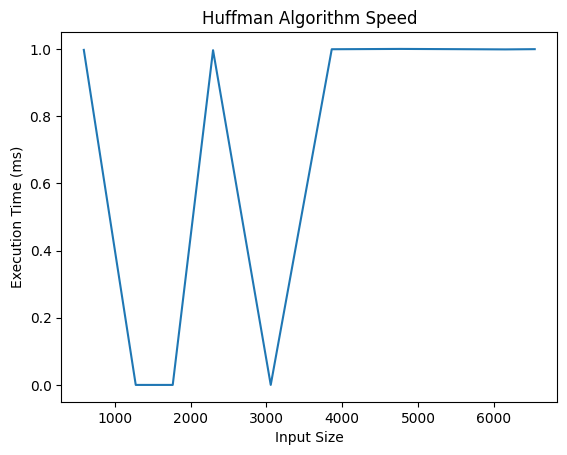

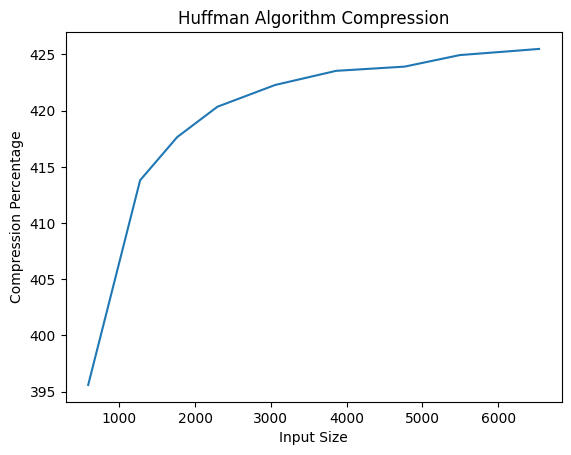

In [39]:
import matplotlib.pyplot as plt
import time
import sys

huffman_code = Huffman()
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("huge_test.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

text = ""

for line in input_data:
    text += line
    size = sys.getsizeof(text)

    start_time = time.time()
    encoded_data = huffman_code.encode(text)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / sys.getsizeof(text)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('Huffman Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('Huffman Algorithm Compression')
plt.show()

плюси:
- Алгоритм Гаффмана ефективний в роботі над об'ємними файлами
- Особливо над текстовими файлами 
- Алгоритм Гаффмана є гарним вибором коли безвтратність даних грає велику роль. 

мінуси:
- Алгоритм Гаффмана - повільний
- Погано працює з частково стиснутими даними

# Алгоритм LZW

In [ ]:
class LZW:
    def encode(self, text: str):
        coding_dict = {}
        for i in range(256):
            coding_dict[chr(i)] = i
        result = []
        curr = ""
        while text:
            if curr + text[0] in coding_dict:
                curr += text[0]
            else:
                result.append(coding_dict[curr])
                coding_dict[curr + text[0]] = len(coding_dict)
                curr = text[0]
            text = text[1:]
        result.append(coding_dict[curr])
        return result, list(coding_dict.keys())

    def decode(self, code: str) -> str:
        code = code[0]
        coding_dict = {}
        for i in range(256):
            coding_dict[i] = chr(i)
        result = ""
        old = code[0]
        result += coding_dict[old]
        code = code[1:]
        while code:
            new = code[0]
            if new in coding_dict:
                result += coding_dict[new]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[new][0]
            else:
                result += coding_dict[old] + coding_dict[old][0]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[old][0]
            old = new
            code = code[1:]
        return result

In [ ]:
class LZW:
    def encode(self, text: str):
        coding_dict = {}
        for i in range(256):
            coding_dict[chr(i)] = i
        result = []
        curr = ""
        while text:
            if curr + text[0] in coding_dict:
                curr += text[0]
            else:
                result.append(coding_dict[curr])
                coding_dict[curr + text[0]] = len(coding_dict)
                curr = text[0]
            text = text[1:]
        result.append(coding_dict[curr])
        return result, list(coding_dict.keys())

    def decode(self, code: str) -> str:
        code = code[0]
        coding_dict = {}
        for i in range(256):
            coding_dict[i] = chr(i)
        result = ""
        old = code[0]
        result += coding_dict[old]
        code = code[1:]
        while code:
            new = code[0]
            if new in coding_dict:
                result += coding_dict[new]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[new][0]
            else:
                result += coding_dict[old] + coding_dict[old][0]
                coding_dict[len(coding_dict)] = coding_dict[old] + coding_dict[old][0]
            old = new
            code = code[1:]
        return result

In [ ]:
lorem_ipsum_lines = []
with open("test_small.txt", "r", encoding="utf-8") as file:
    for line in file:
        if line.strip() == "":
            continue
        lorem_ipsum_lines.append(line.strip())
encoded_ipsum = []
decoded_ipsum = []
# print(lorem_ipsum_lines)
lzw = LZW()
for line in lorem_ipsum_lines:
    encoded_ipsum.append(lzw.encode(line))
    decoded_ipsum.append(lzw.decode(encoded_ipsum[-1]))
# encoded_ipsum, coding_dict = lzw.encode(lorem_ipsum_lines[0])
# print(lzw.encode(encoded_ipsum))
for line in lorem_ipsum_lines:
    print(line == decoded_ipsum[lorem_ipsum_lines.index(line)])

True


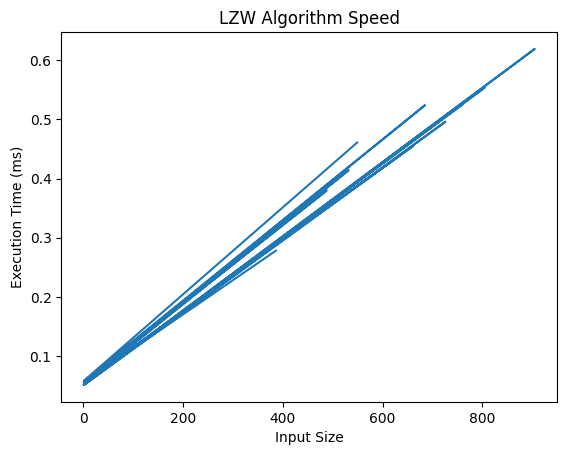

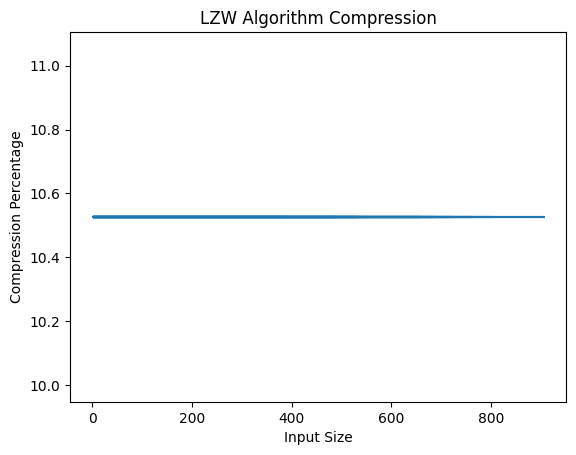

In [ ]:
import matplotlib.pyplot as plt
import time

lzw = LZW()
sizes = []
times = []
compression_percentages = []

# Measure the execution time and compression percentage for each input size
with open("test_huge.txt", "r", encoding="utf-8") as file:
    input_data = file.readlines()

for line in input_data:

    start_time = time.time()
    encoded_data = lzw.encode(line)
    size = len(line)
    end_time = time.time()

    execution_time = (end_time - start_time) * 1000
    compression_percentage = (len(encoded_data) / len(input_data)) * 100

    sizes.append(size)
    times.append(execution_time)
    compression_percentages.append(compression_percentage)

# Plot the input sizes vs. execution times
plt.plot(sizes, times)
plt.xlabel('Input Size')
plt.ylabel('Execution Time (ms)')
plt.title('LZW Algorithm Speed')
plt.show()

# Plot the input sizes vs. compression percentages
plt.plot(sizes, compression_percentages)
plt.xlabel('Input Size')
plt.ylabel('Compression Percentage')
plt.title('LZW Algorithm Compression')
plt.show()


In [ ]:
class LZW:
    def encode(self, text: str) -> tuple[str, list]:
        pass

    def decode(self, code: str, coding_dict: list) -> str:
        pass

# Алгоритм LZ77

Потрібно заміряти розміри саме тексту, проте для роботи доцільно використовувати список тюплів, тому для зручності варто імплементувати додаткові алгоритми _text2list та _list2text

In [158]:
class LZ77:
    def __init__(self, buffer_size: int):
        self.buffer_size = buffer_size
    
    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass

LZ77 is simple compresion algorithm which leaves details of implementation to programmer. It's power lies in compresing repetetive data such as network data transmision, images, storage optimizations.

# Алгоритм Deflate

In [ ]:
class Deflate:
    def __init__(self, buffer_size: int):
        pass

    def encode(self, text: str) -> str:
        pass

    def decode(self, code: str) -> str:
        pass